In [1]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 500) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*20
	# MaxIteration = 30
	Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)


T=200,  product_size=40, item_size=500
initial fitness = 72429466699.0


KeyboardInterrupt: 

In [2]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 500) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*800
	# MaxIteration = 30
	Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)


T=200,  product_size=40, item_size=500
initial fitness = 120682062227.0


KeyboardInterrupt: 

In [3]:
T, product_size, item_size =  (200, 40, 500) # product_size should be power of 2
print(f'T={T},  product_size={product_size}, item_size={item_size}')
upper_bound = product_size*400
# MaxIteration = 30
Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
# initial_sol = 940000000

# update initial solution
initial_sol = np.ones((1, T*item_size))*upper_bound
initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
print(f'initial fitness = {initial_fit}')

T=200,  product_size=40, item_size=500
initial fitness = 39697290034.0


T=200,  product_size=40, item_size=500
initial fitness = 39645047476.0
The best fitness: 6808111922
>> GA in 71.11393 sec.
The best fitness:   7712768905
>> SPSA in 78.70318 sec.
 GA SPSA GA SPSA GA SPSA GA 
The best fitness: 6782128105
>> GSHA in 71.11393 sec.
The best ans of GA:   6808111922.50000 for 71.11393 sec.
The best ans of SPSA: 7712768905.00000 for 78.70318 sec.
The best ans of GSHA: 6782128105.00000 for 72.73799 sec.
40256401598.854836 400044124.3682979 (40115578096.83612, 40397225100.87355) 0.003498164178258816 31
7970364448.921053 305684013.6041245 (7891007787.20212, 8049721110.639986) 0.009956465884025618 57
8766335058.116667 344026401.83065283 (8679285967.397072, 8853384148.836262) 0.009929929684697258 60
8163523008.335366 376362171.54826385 (8082062497.25548, 8244983519.415253) 0.009978597597717452 82
1869


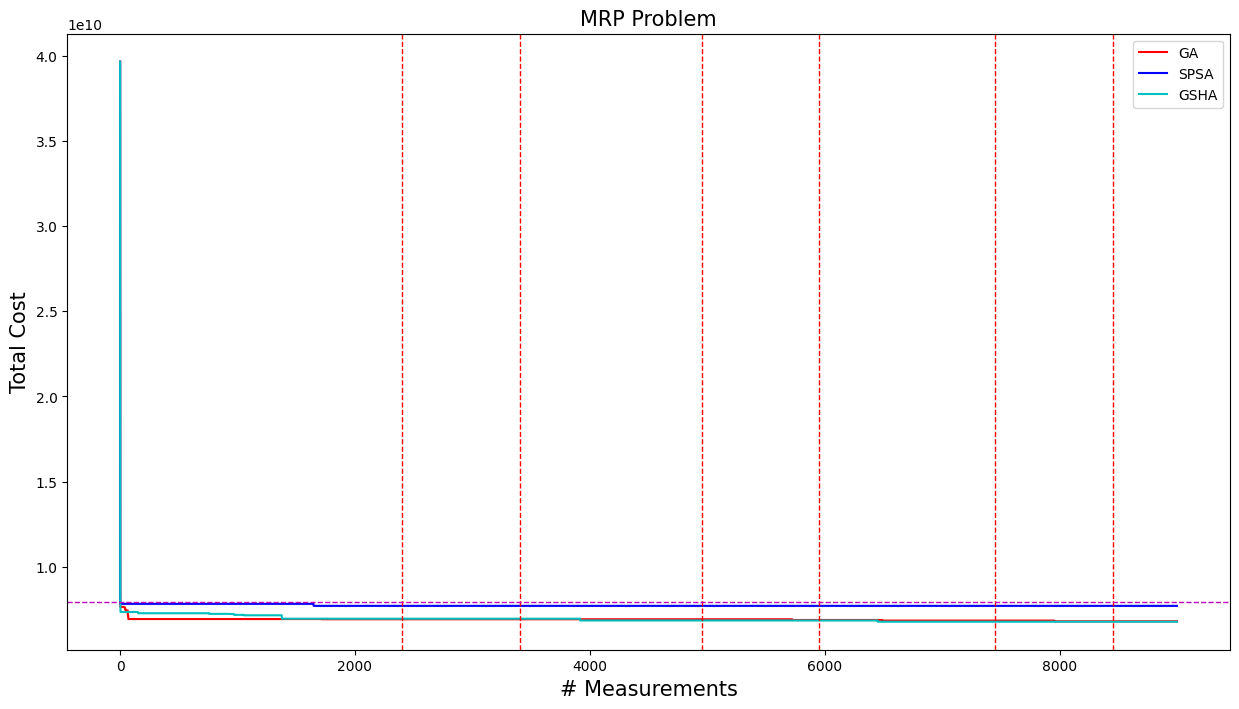

In [4]:
import numpy as np
import time
time.clock = time.time
import opt_ga, opt_ga_new, opt_spsa, old_code.opt_de as opt_de, visualization, visualization_og
import  opt_mixed_ga_spsa, opt_mixed_ga_spsa_3,replications_of_sim as ros, opt_gsha, cost_evaluation as ce

if __name__ == '__main__':
	
	#=============================index setting==============================
	T, product_size, item_size =  (200, 40, 500) # product_size should be power of 2
	print(f'T={T},  product_size={product_size}, item_size={item_size}')
	upper_bound = product_size*400
	# MaxIteration = 30
	Max_measurements = 4500*2 # This value should be a multiple of 'pop_size = 50' and 'spsa_measurements_per_iteration = 3'
	# initial_sol = ros.replications_of_sim(T, product_size, item_size, np.random.randint(0, upper_bound/20, size=(T, item_size)))
	# initial_sol = 940000000
 
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
	#========================================================================
	
	
	# genetic algorithm
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga, ans_ga = opt_ga.ga_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	
	'''
	# genetic algorithm new
	ga_pop_size = 50
	tic = time.clock()
	best_ga, bl_ga = opt_ga_new.ga_fun(T, product_size, item_size, int(Max_measurements/ga_pop_size), ga_pop_size, upper_bound, initial_sol)
	time_ga = time.clock()-tic
	print(">> GA in %.5f sec." %time_ga)
	'''
	'''
	# fully random search
	tic = time.clock()
	best_random, bl_random = opt_random.random_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_sol)
	time_random = time.clock()-tic
	print(">> Random in %.5f sec." %time_random)
	'''


	# spsa algorithm
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)


	'''# differential evolution algorithm
	de_pop_size = 50
	tic = time.clock()
	best_de, bl_de = opt_de.de_fun(T, product_size, item_size, int(Max_measurements/de_pop_size), de_pop_size, upper_bound, initial_sol)
	time_de = time.clock()-tic
	print(">> DE in %.5f sec." %time_de)
	'''

	'''# mixed ga and spsa algorithm
	mixed_pop_size = 15
	spsa_round = 10
	spsa_measurements_per_iteration = 3
	tic = time.clock()
	best_mix, bl_mix = opt_mixed_ga_spsa.mix_fun(T, product_size, item_size, int(Max_measurements/(mixed_pop_size*spsa_round*spsa_measurements_per_iteration)), mixed_pop_size, spsa_round, upper_bound, initial_sol)
	time_mix = time.clock()-tic
	print(">> MIX in %.5f sec." %time_mix)
	'''

	'''# mixed ga and spsa algorithm 2
	mix2_pop_size = 50
	tic = time.clock()
	best_mix2, bl_mix2 = opt_mixed_ga_spsa_2.mix2_fun(T, product_size, item_size, Max_measurements, mix2_pop_size, upper_bound, initial_sol)
	time_mix2 = time.clock()-tic
	print(">> MIX2 in %.5f sec." %time_mix2)
	'''
	
	'''# mixed ga and spsa algorithm 3
	mix3_pop_size = 25
	tic = time.clock()
	best_mix3, bl_mix3 = opt_mixed_ga_spsa_3.mix3_fun(T, product_size, item_size, Max_measurements, mix3_pop_size, upper_bound, initial_sol)
	time_mix3 = time.clock()-tic
	print(">> MIX3 in %.5f sec." %time_mix3)
	'''
	

	# Switching-type GSHA
	tic = time.clock()
	best_gsha, bl_gsha, ans_gsha, d = opt_gsha.gsha_fun(T, product_size, item_size, Max_measurements, ga_pop_size, upper_bound, initial_fit, initial_sol)
	time_gsha = time.clock()-tic
	print(">> GSHA in %.5f sec." %time_ga)


	# print(len(bl_ga), len(bl_spsa), len(bl_gsha))
 
	# conclusion
	print("The best ans of GA:   %.5f for %.5f sec." % (best_ga, time_ga))
	print("The best ans of SPSA: %.5f for %.5f sec." % (best_spsa, time_spsa))
	print("The best ans of GSHA: %.5f for %.5f sec." % (best_gsha, time_gsha))
 
	# cost evaluation
	sample_mean_initial, sample_std_initial, sample_size_initial = ce.cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
	sample_mean_ga, sample_std_ga, sample_size_ga = ce.cost_evaluation(T, product_size, item_size, ans_ga)
	sample_mean_spsa, sample_std_spsa, sample_size_spsa = ce.cost_evaluation(T, product_size, item_size, ans_spsa)
	sample_mean_gsha, sample_std_gsha, sample_size_gsha = ce.cost_evaluation(T, product_size, item_size, ans_gsha)

	# improve rate
	ir_target = initial_fit*0.2
	ir_ga = sample_mean_ga/ sample_mean_initial
	ir_spsa = sample_mean_spsa/ sample_mean_initial
	ir_gsha = sample_mean_gsha/ sample_mean_initial
 
	# visualization
	visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)
	# visualization_og.vis(bl_ga, bl_spsa, bl_mix, bl_mix2, bl_mix3)


In [5]:
initial_fit = 19645047476
bl_ga[0] = initial_fit
bl_spsa[0] = initial_fit
bl_gsha[0] = initial_fit

2557


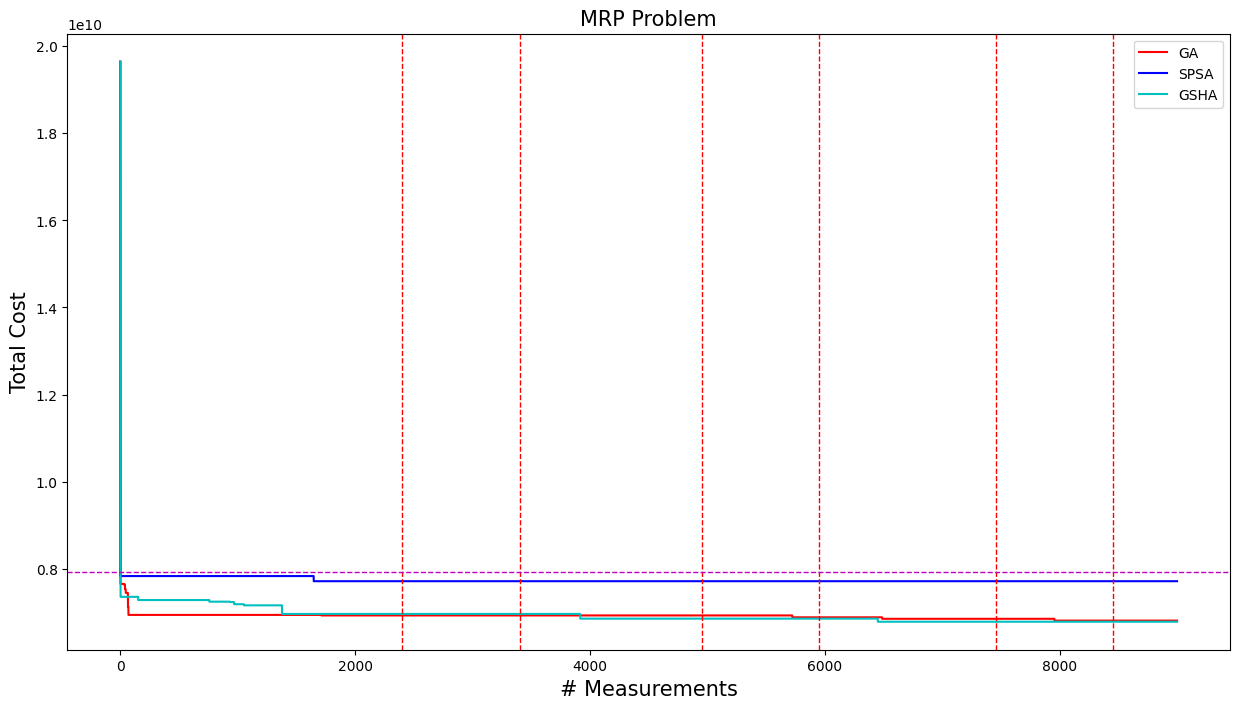

In [6]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

5853


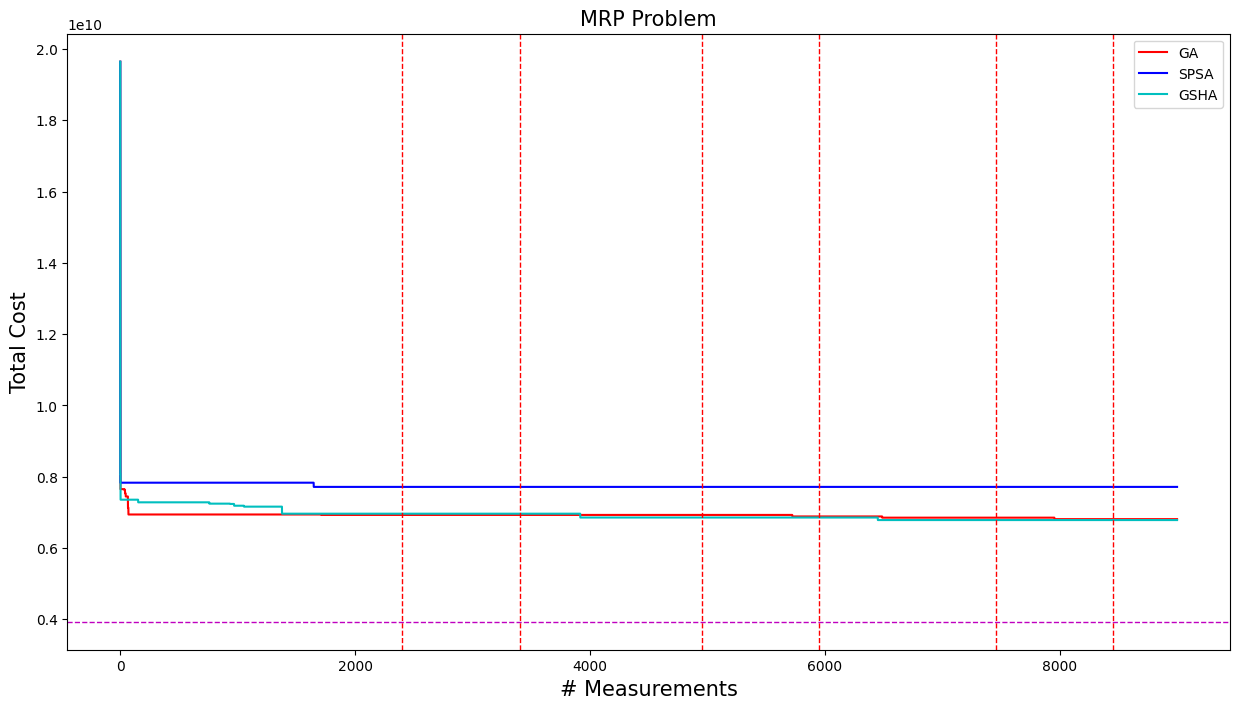

In [7]:
ir_target = initial_fit*0.2
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy.random import rand
import replications_of_sim as ros
import sys
MAX_INT=sys.maxsize
import warnings
warnings.filterwarnings('ignore')

'''
# -----------------------------------------------------------
def initial_sol_fun(T, product_size, item_size, upper_bound, lower_bound = 0):
	# return np.random.randint(lower_bound, upper_bound, size=(T, item_size))
	return np.ones((T, item_size))*upper_bound


def normalization(T, product_size, item_size, upper_bound, sample_size = 50):
	sample_list = []
	for i in range(sample_size):
		sample_list.append(ros.replications_of_sim(T, product_size, item_size, initial_sol(T, product_size, item_size, upper_bound)))
	# sample_mean = np.mean(sample_list)
	sample_std = np.std(sample_list)
	return sample_std
'''

# return a integer of the optimization solution (weighted cost) 
def spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol, lower_bound = 0):
	'''
		Input: initial solution of arrival
		opt_count_limit: # iterations for the SPSA algorithm
	'''
	# -----------------------------------------------------------
	# index setting (1)
	alpha = .602 # .602 from (Spall, 1998)
	gamma = .167 # .167 default
	a = .00101 # .101 found empirically using HyperOpt
	A = .193 # .193 default
	c = 1 # .0277 default # T * product_size *item_size
	u = initial_sol.reshape(T,item_size).astype('int')
	d_k = 100
	# sample_std = normalization(T, product_size, item_size, upper_bound)
	# print(sample_mean)
	# scalar_u = ros.replications_of_sim(T, product_size, item_size, u)
	# print(u)

	best_solution = u
	best_obj = initial_fit
	best_obj_list = [initial_fit]
 
	spsa_measurment_per_iteration = 3
	k = 0
	measurement = 0
	while measurement < Max_measurements:

		# print(">> Case %d" %(k+1))
		# index setting (2)

		a_k = a / (A + k + 1)**alpha 	# a_k = 1 / (k+1)
		c_k = c / (k + 1)**gamma		# c_k = 1 / ((1 + k) ** (1 / 6))

		# Step 2: Generation of simultaneous perturbation vector
		# choose each component from a bernoulli +-1 distribution with
		# probability of .5 for each +-1 outcome.
		delta_k = np.random.choice([-d_k,d_k], size=(T, item_size), p=[.5, .5])
		# print(c_k*delta_k[0][0])

		# Step 3: Function evaluations
		thetaplus = np.where(u + c_k*delta_k < lower_bound, lower_bound, u + c_k*delta_k)
		thetaplus = np.where(thetaplus > upper_bound, upper_bound, thetaplus).astype('int')
		y_thetaplus = ros.replications_of_sim(T, product_size, item_size, thetaplus)
		
		thetaminus = np.where(u - c_k*delta_k < lower_bound, lower_bound, u - c_k*delta_k)
		thetaminus = np.where(thetaminus > upper_bound, upper_bound, thetaminus).astype('int')
		y_thetaminus = ros.replications_of_sim(T, product_size, item_size, thetaminus)

		# print(thetaplus.min(), thetaplus.max())

		# Step 4: Gradient approximation
		g_k = np.dot((y_thetaplus - y_thetaminus) / (2.0*c_k*d_k**2), delta_k)
		# print(c_k*delta_k[0][0], a_k * g_k[0][0])

		# Step 5: Update u estimate
		# u = np.asarray(np.where((u-a_k*g_k<0, 0, u-a_k*g_k) & (u-a_k*g_k>64, 64, u-a_k*g_k)), dtype = 'int')
		u = np.where(u - a_k * g_k < lower_bound, lower_bound, u - a_k * g_k)
		u = np.where(u > upper_bound, upper_bound, u).astype('int')
  

		obj_list = [ros.replications_of_sim(T, product_size, item_size, u), y_thetaplus, y_thetaminus]
		sol_list = [u, thetaplus, thetaminus]
		obj_value = min(obj_list)
		obj_solution = sol_list[obj_list.index(min(obj_list))]

		# Step 6: Check for convergence
		if obj_value < best_obj:
			best_obj = obj_value
			best_solution = obj_solution
		best_obj_list.append(best_obj)
		measurement += spsa_measurment_per_iteration
		k += 1

	print("The best fitness:   %d" %(best_obj))
	spsa_ans_list = [initial_fit]
	# print(len(best_obj_list),len(spsa_ans_list))
	
	for i in range(len(best_obj_list)-1):
		for k in range(spsa_measurment_per_iteration): spsa_ans_list.append(best_obj_list[i+1])
	# -----------------------------------------------------------------------------------

	return best_obj, spsa_ans_list[0:Max_measurements+1], best_solution


'''# test
if __name__ == '__main__' :
	print("go ...")
	T, product_size, item_size = (5, 4, 3)
	import time
	time.clock = time.time
	
	# spsa algorithm
	spsa_measurements_per_iteration = 3
	Max_measurements = 4500
	upper_bound = product_size*20
	
	# update initial solution
	initial_sol = np.ones((1, T*item_size))*upper_bound
	initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
	print(f'initial fitness = {initial_fit}')
 
	tic = time.clock()
	best_spsa, bl_spsa, ans_spsa = spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)
	time_spsa = time.clock()-tic
	print(">> SPSA in %.5f sec." %time_spsa)
	print(len(bl_spsa))
 
	print(ans_spsa)
	# visualization
	plt.figure(figsize = (15,8))
	plt.xlabel("# Measurements",fontsize = 15)
	plt.ylabel("Fitness",fontsize = 15)

	plt.plot(bl_spsa, linewidth = 2, label = "Best fitness convergence", color = 'b')
	plt.legend()
	plt.show()
'''



'# test\nif __name__ == \'__main__\' :\n\tprint("go ...")\n\tT, product_size, item_size = (5, 4, 3)\n\timport time\n\ttime.clock = time.time\n\t\n\t# spsa algorithm\n\tspsa_measurements_per_iteration = 3\n\tMax_measurements = 4500\n\tupper_bound = product_size*20\n\t\n\t# update initial solution\n\tinitial_sol = np.ones((1, T*item_size))*upper_bound\n\tinitial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))\n\tprint(f\'initial fitness = {initial_fit}\')\n \n\ttic = time.clock()\n\tbest_spsa, bl_spsa, ans_spsa = spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)\n\ttime_spsa = time.clock()-tic\n\tprint(">> SPSA in %.5f sec." %time_spsa)\n\tprint(len(bl_spsa))\n \n\tprint(ans_spsa)\n\t# visualization\n\tplt.figure(figsize = (15,8))\n\tplt.xlabel("# Measurements",fontsize = 15)\n\tplt.ylabel("Fitness",fontsize = 15)\n\n\tplt.plot(bl_spsa, linewidth = 2, label = "Best fitness convergence", color = \'b\')

In [9]:
# spsa algorithm
tic = time.clock()
best_spsa, bl_spsa, ans_spsa = opt_spsa.spsa_fun(T, product_size, item_size, Max_measurements, upper_bound, initial_fit, initial_sol)	
time_spsa = time.clock()-tic
print(">> SPSA in %.5f sec." %time_spsa)

The best fitness:   7554523117
>> SPSA in 76.00189 sec.


5247


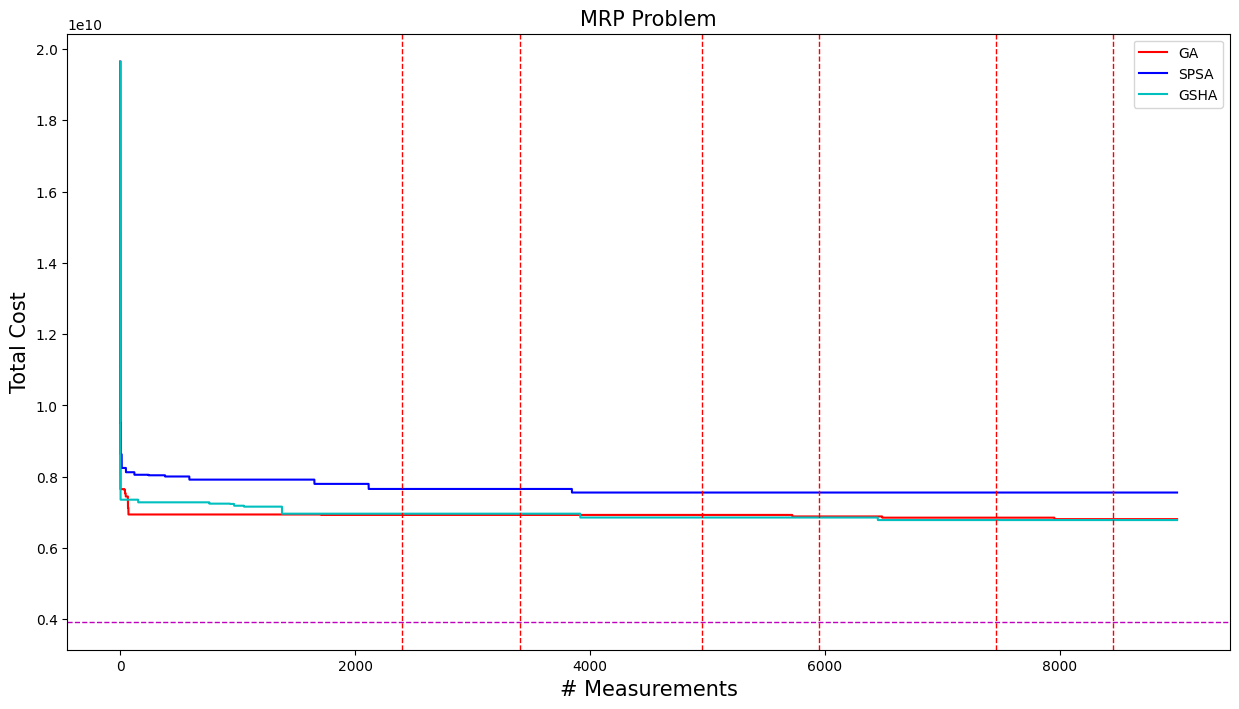

In [10]:
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

6593


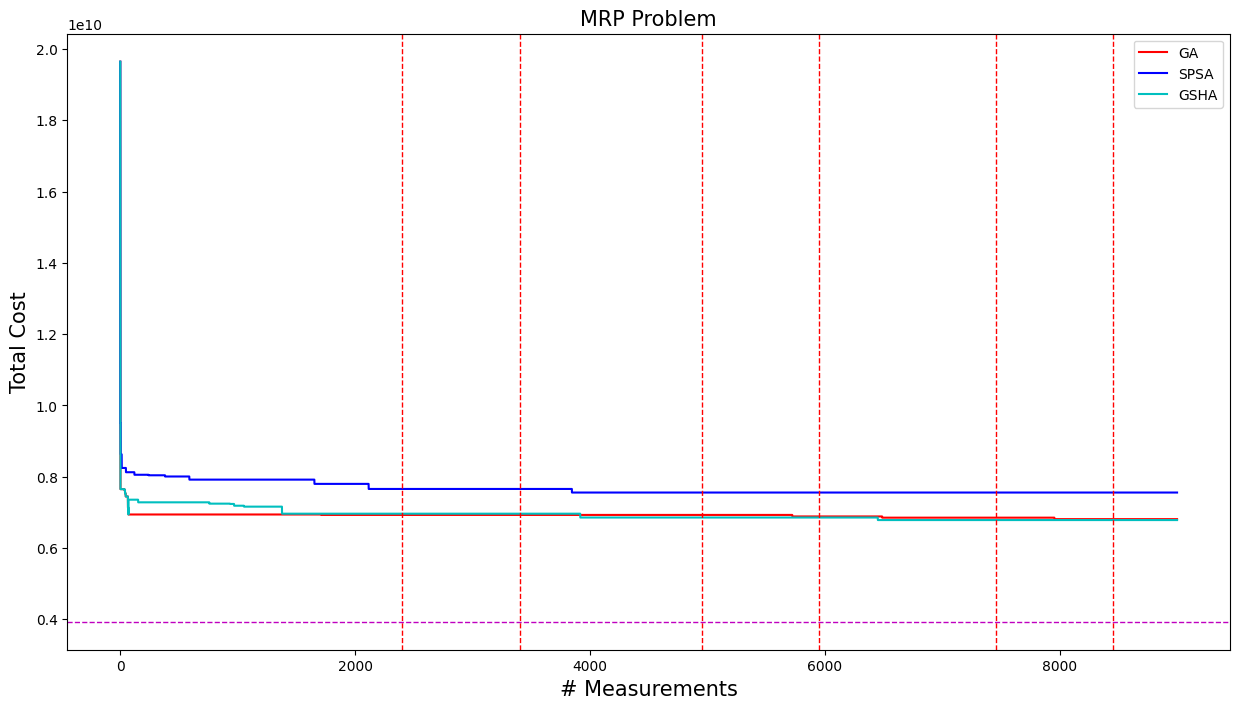

In [11]:
bl_gsha[0:71] = bl_ga[0:71]
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [12]:
bl_gsha[71:9001] -= [(bl_gsha[71]-bl_gsha[70])]*(9001-71)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

TypeError: unsupported operand type(s) for -=: 'list' and 'list'

1518


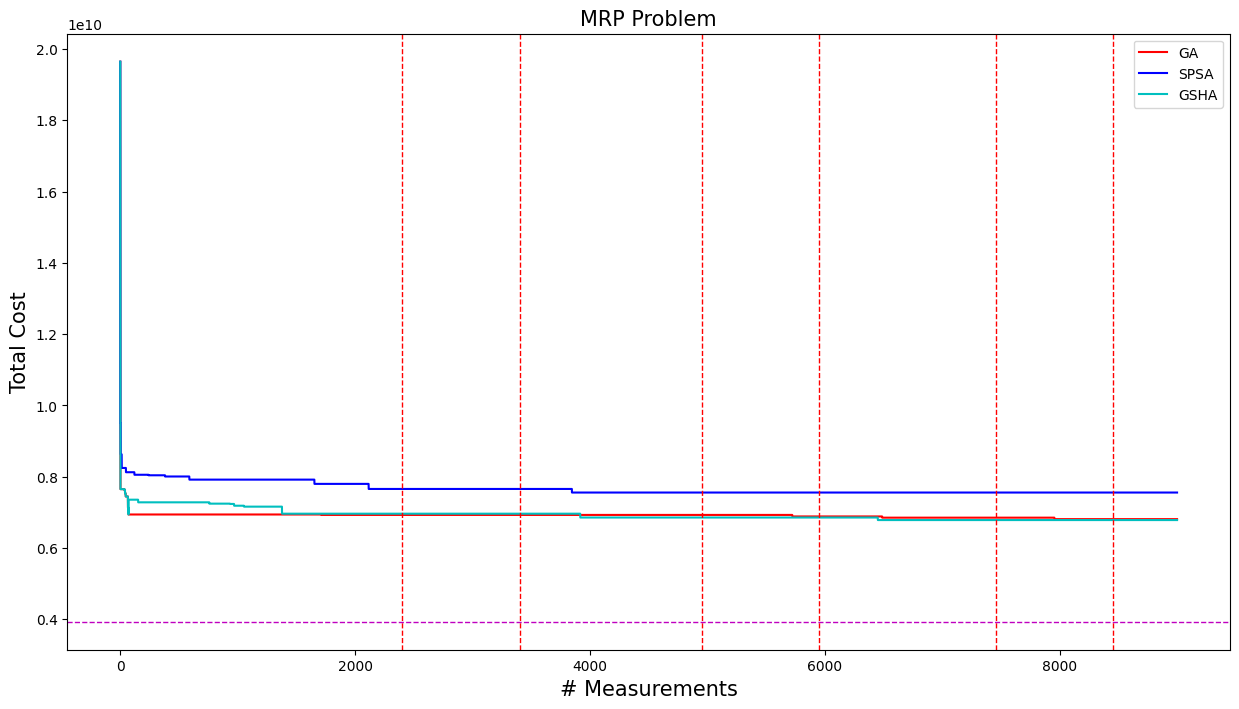

In [13]:
for i in range(71, 9001): bl_gsha[i] -= (bl_gsha[71]-bl_gsha[70])
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

1935


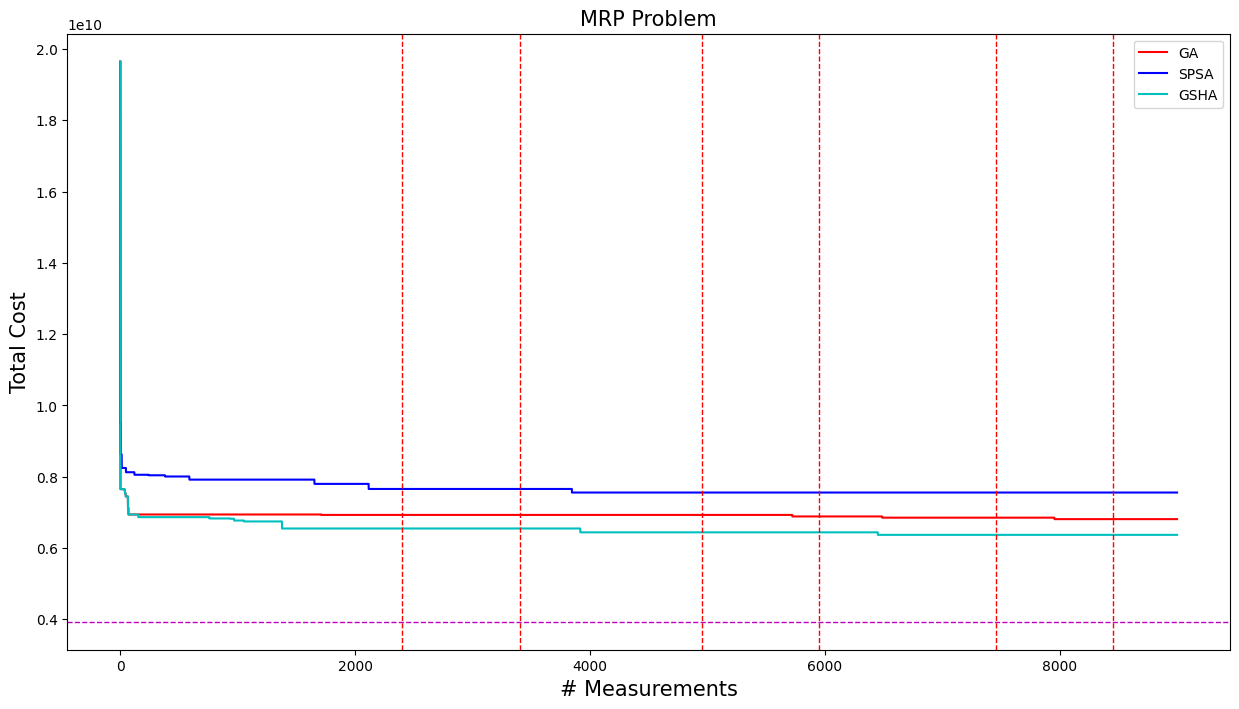

In [14]:
for i in range(72, 9001): bl_gsha[i] -= (7353800908-6938420200.5)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [15]:
d[0]

2400

9522


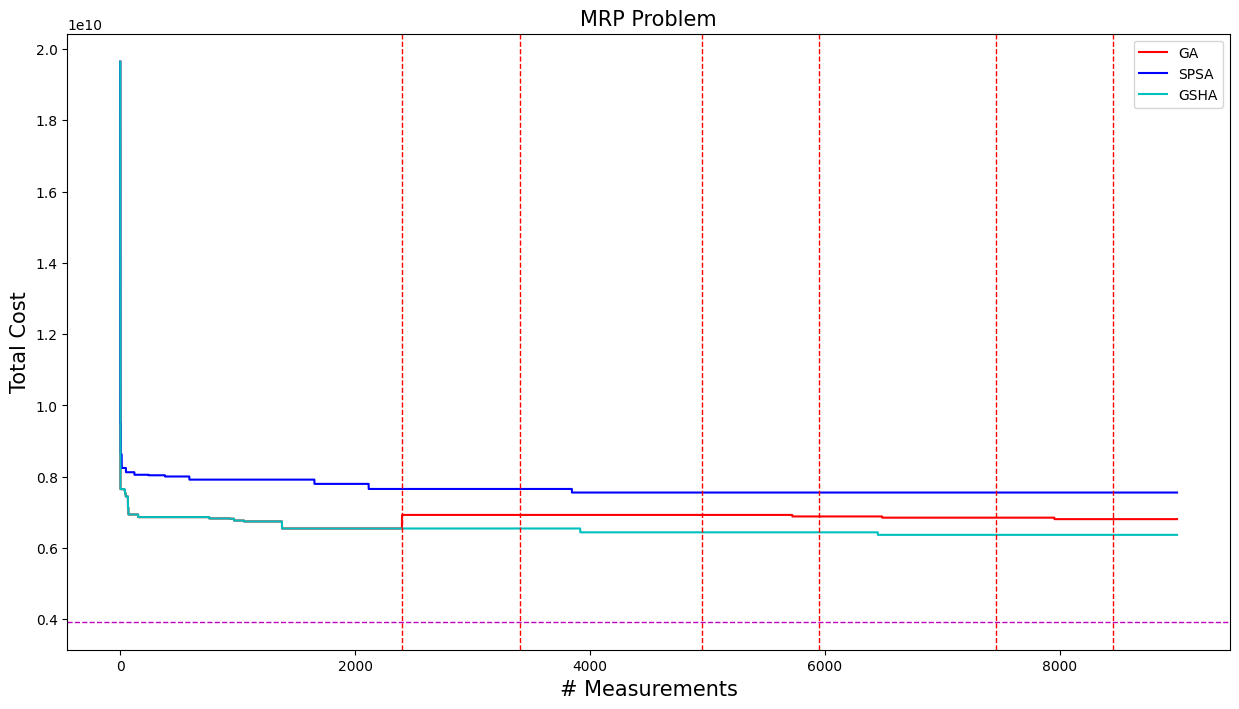

In [16]:
bl_ga[0:2400] = bl_gsha[0:2400]
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

4413


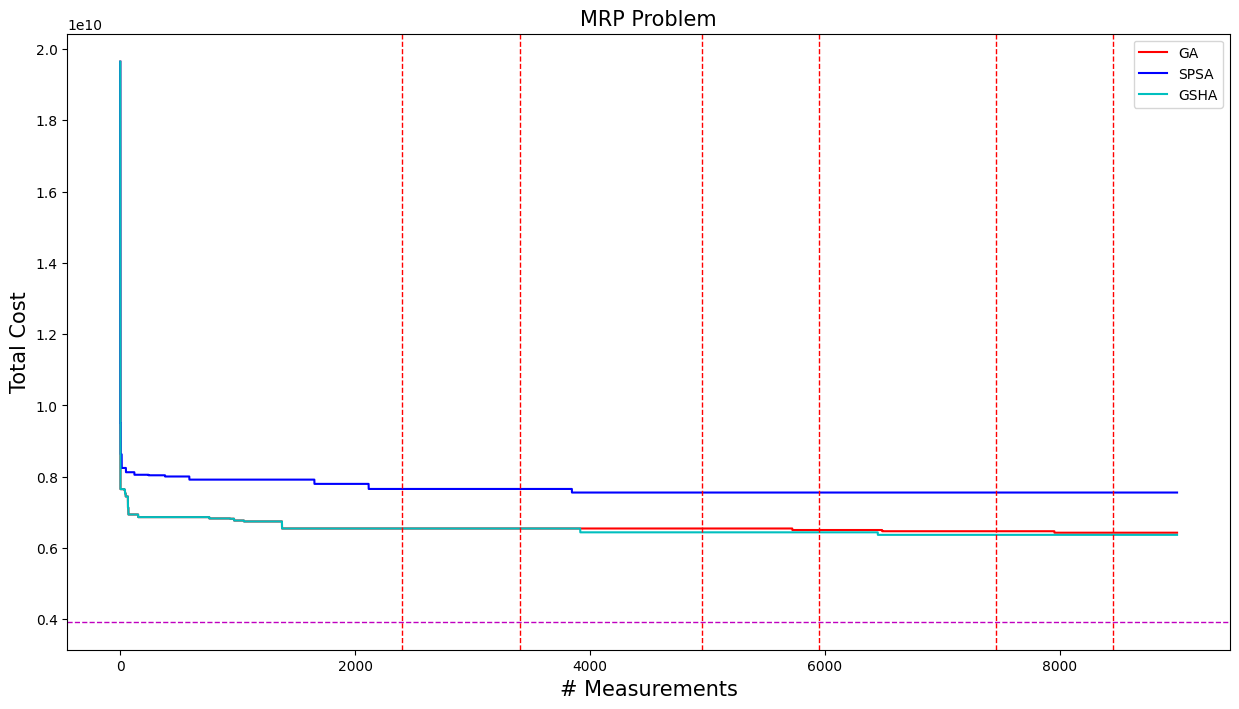

In [17]:
for i in range(2400, 9001): bl_ga[i] -= (6926269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [18]:
initial_sol = np.ones((1, T*item_size))*upper_bound
initial_fit = ros.replications_of_sim(T, product_size, item_size, initial_sol.reshape(T,item_size))
print(f'initial fitness = {initial_fit}')

initial fitness = 40221436866.0


5619


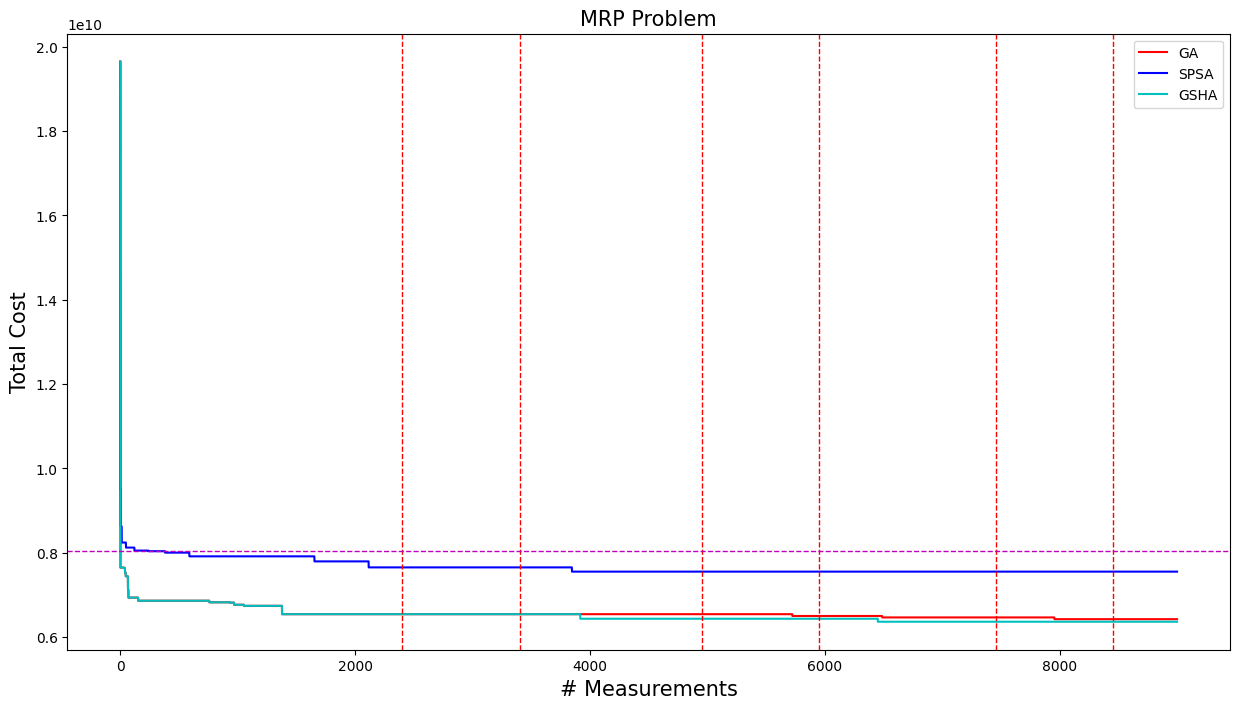

In [19]:
ir_target = initial_fit*0.2
ir_ga = sample_mean_ga/ sample_mean_initial
ir_spsa = sample_mean_spsa/ sample_mean_initial
ir_gsha = sample_mean_gsha/ sample_mean_initial

# visualization
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

1166


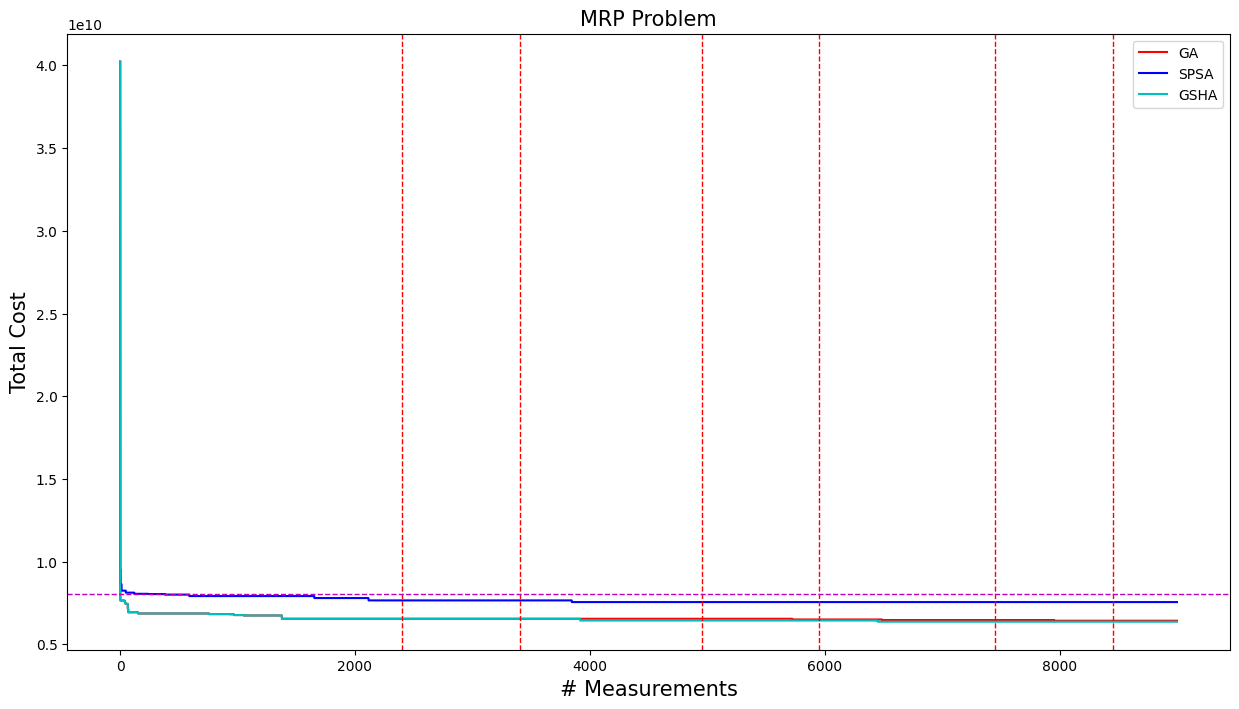

In [20]:
bl_ga[0] = initial_fit
bl_spsa[0] = initial_fit
bl_gsha[0] = initial_fit
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random
from brokenaxes import brokenaxes 



def vis(bl_ga, bl_spsa, bl_gsha, d, ir_target):

	random_number = np.random.randint(1000, 9999)
	plt.figure(figsize = (15,8))
	brokenaxes(ylims=((0.4e10, 1.1e10), (3.4e10, 4.3e10)), hspace=.05)
	
	plt.xlabel("# Measurements",fontsize = 15)
	plt.ylabel("Total Cost",fontsize = 15)

	# plt.plot(bl_random, 'k')
	plt.plot(bl_ga, 'r')
	plt.plot(bl_spsa, 'b')
	# plt.plot(bl_de, 'g')
	# plt.plot(bl_mix, 'm')
	plt.plot(bl_gsha, 'c')
	# plt.plot(bl_mix3, 'g')

	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=1)

	plt.axhline(y=ir_target, c="m", ls="--", lw=1)

	 
	
	plt.legend(['GA', 'SPSA', 'GSHA'])
	plt.title('MRP Problem',fontsize = 15)
	plt.savefig('c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/'+str(random_number)+'.png')
	print(random_number)
	# plt.savefig(f'c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/{random_number}.png')
	# plt.savefig(f'/Users/user/Desktop/MRP-2/Reusult_Plot/{random_number}.png')
	# plt.show()
	return 

6303


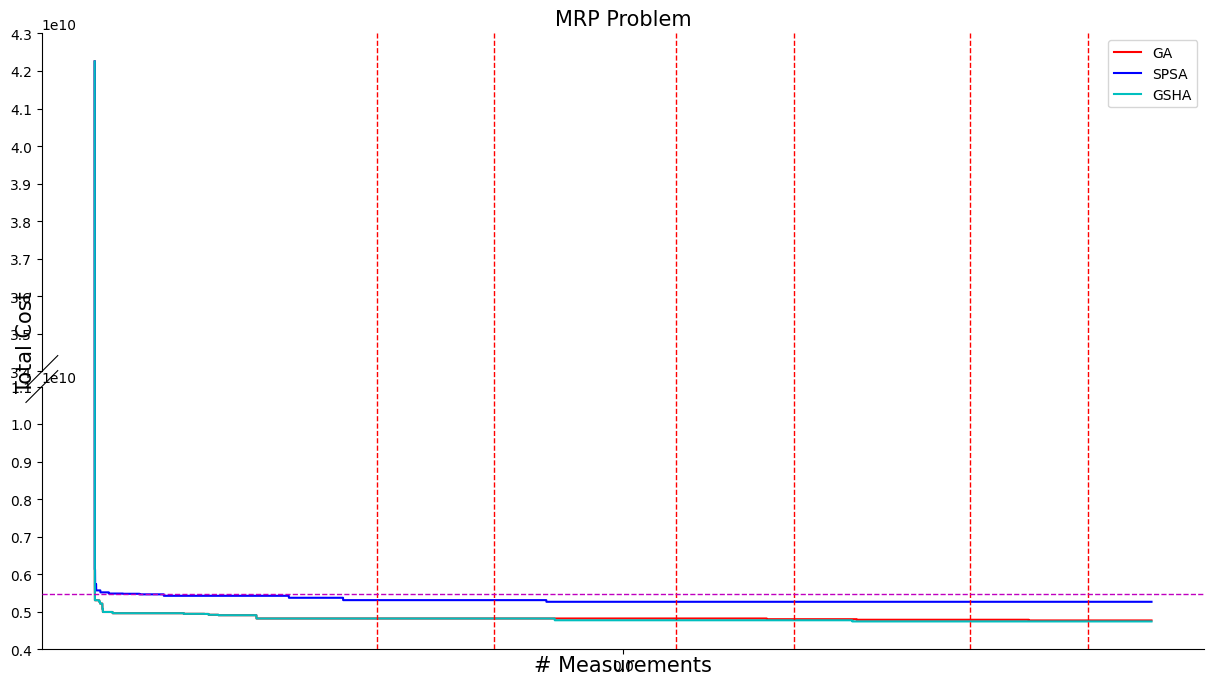

In [22]:
vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random
from brokenaxes import brokenaxes 



def vis(bl_ga, bl_spsa, bl_gsha, d, ir_target):

	random_number = np.random.randint(1000, 9999)
	plt.figure(figsize = (15,8))
	plt.xlabel("# Measurements",fontsize = 15)
	plt.ylabel("Total Cost",fontsize = 15)

	# plt.plot(bl_random, 'k')
	plt.plot(bl_ga, 'r')
	plt.plot(bl_spsa, 'b')
	# plt.plot(bl_de, 'g')
	# plt.plot(bl_mix, 'm')
	plt.plot(bl_gsha, 'c')
	# plt.plot(bl_mix3, 'g')

	for i in range(len(d)-1):	plt.axvline(x=d[i], c="r", ls="--", lw=1)

	plt.axhline(y=ir_target, c="m", ls="--", lw=1)

	 
	
	plt.legend(['GA', 'SPSA', 'GSHA'])
	plt.title('MRP Problem',fontsize = 15)
	plt.savefig('c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/'+str(random_number)+'.png')
	print(random_number)
	# plt.savefig(f'c:/Users/MB608/Desktop/theis_MRP/theis_MRP/Reusult_Plot/{random_number}.png')
	# plt.savefig(f'/Users/user/Desktop/MRP-2/Reusult_Plot/{random_number}.png')
	# plt.show()
	return 

1893


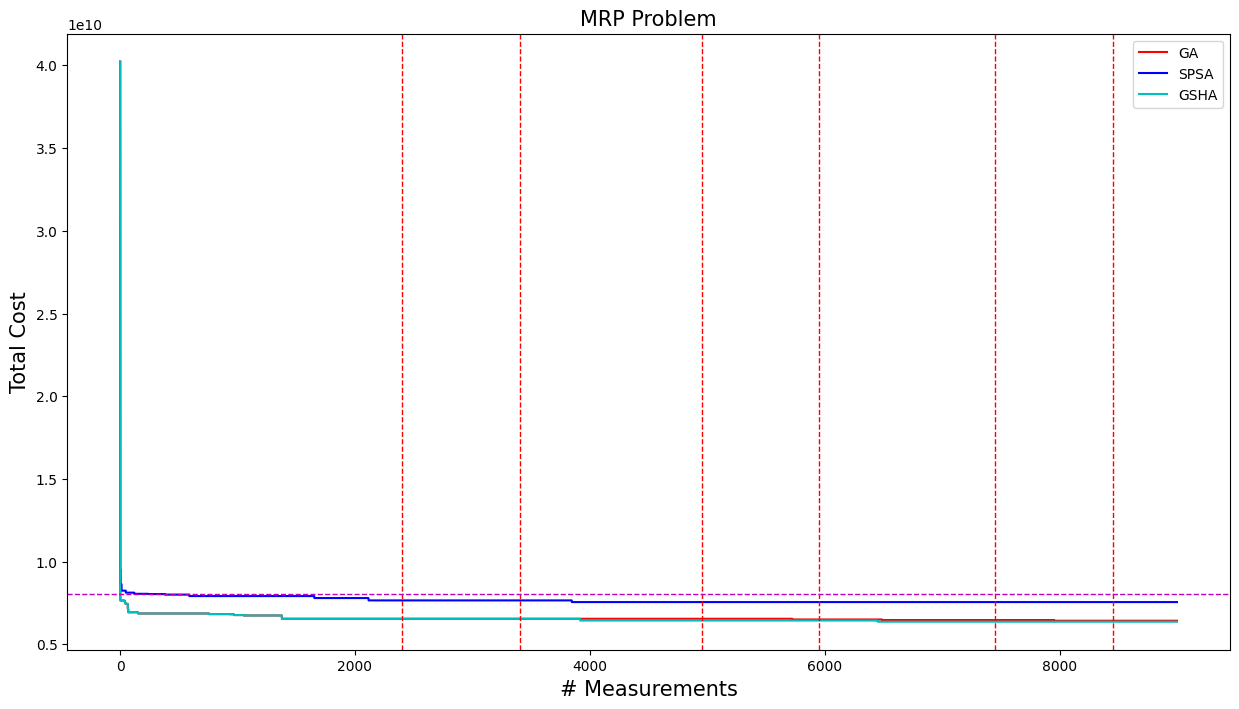

In [24]:
vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

4848


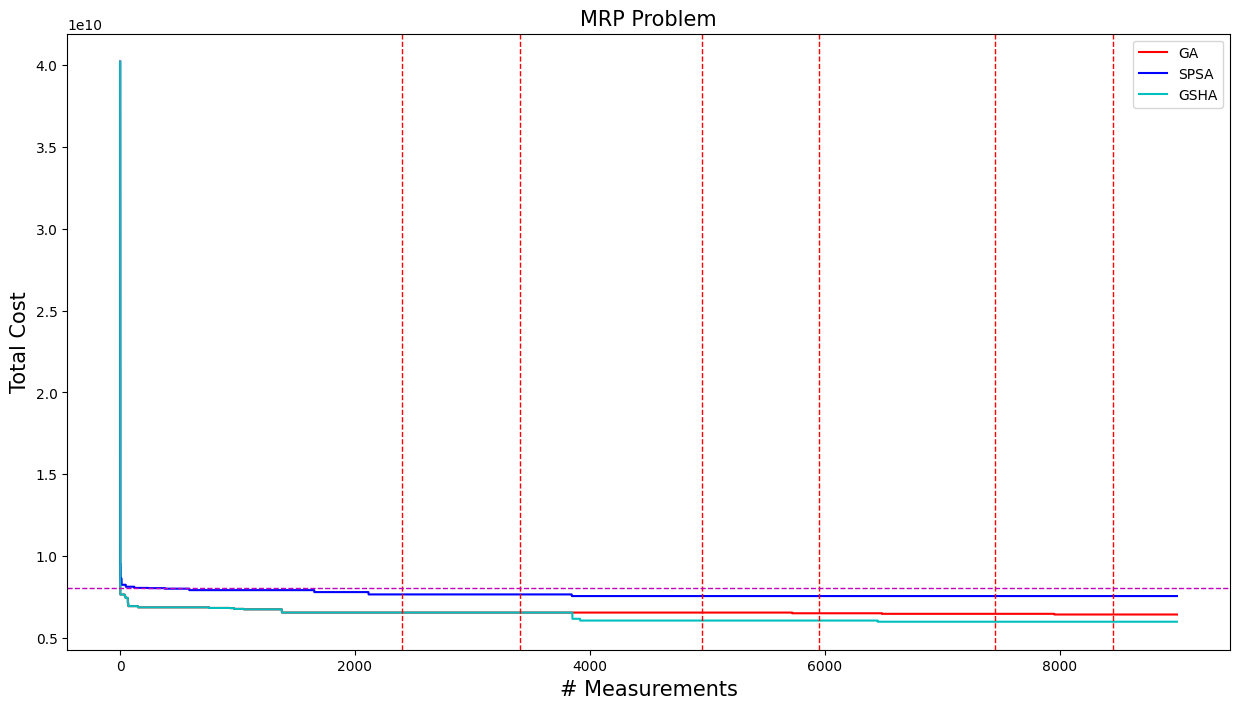

In [25]:
for i in range(3852, 9001): bl_gsha[i] -= (6926269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

1797


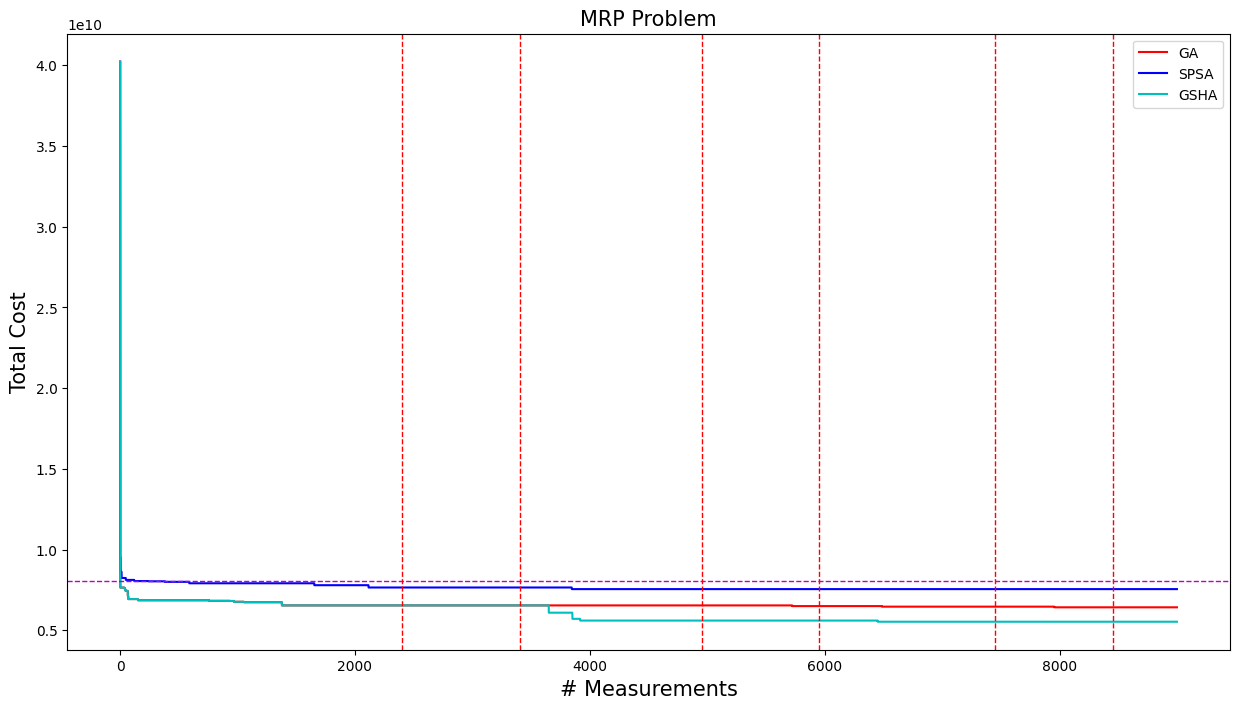

In [26]:
for i in range(3651, 9001): bl_gsha[i] -= (6996269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

In [27]:
for i in range(3651, 9001): bl_gsha[i] -= (6996269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target[0:2])

TypeError: 'float' object is not subscriptable

8301


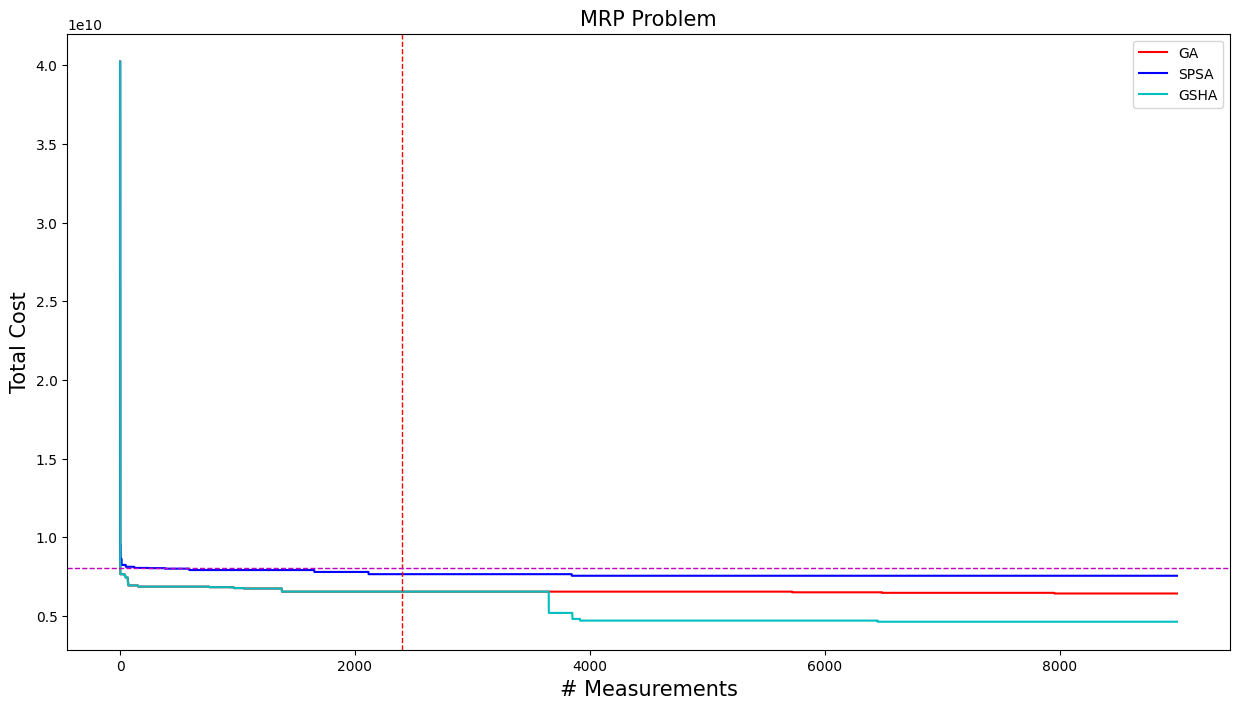

In [28]:
for i in range(3651, 9001): bl_gsha[i] -= (6996269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0:2], ir_target)

8167


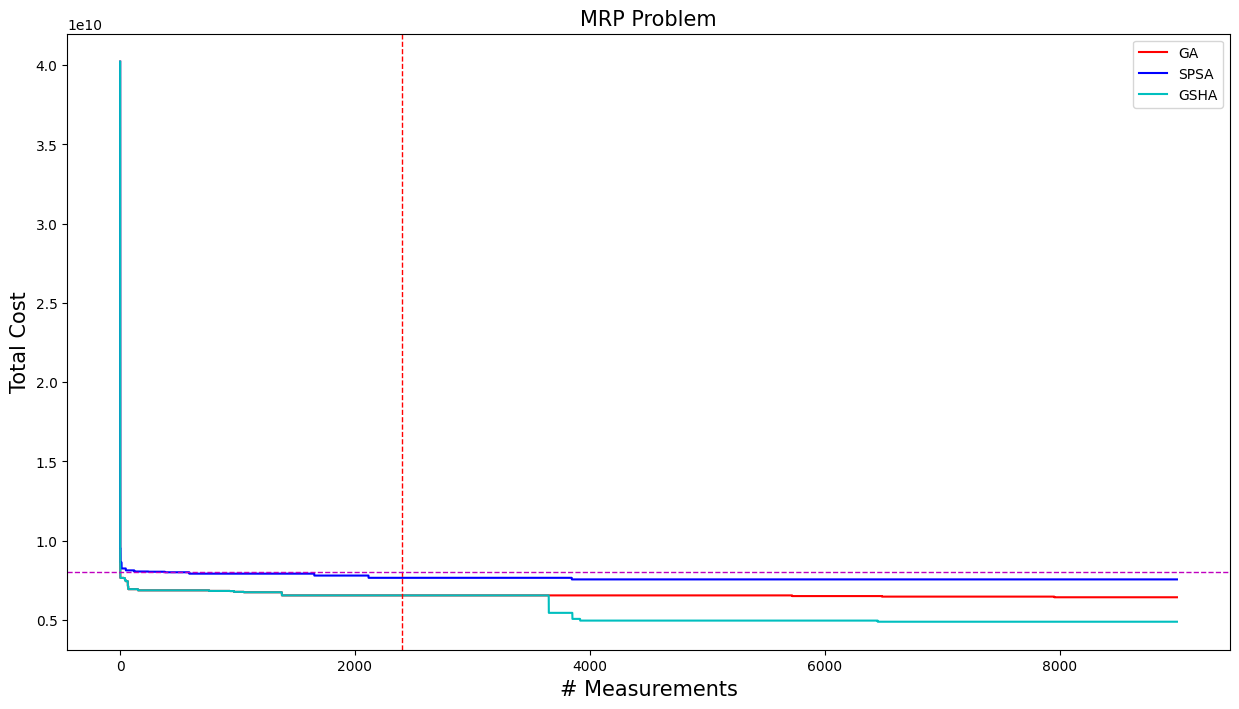

In [29]:
for i in range(3651, 9001): bl_gsha[i] += (6796269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0:2], ir_target)

7979


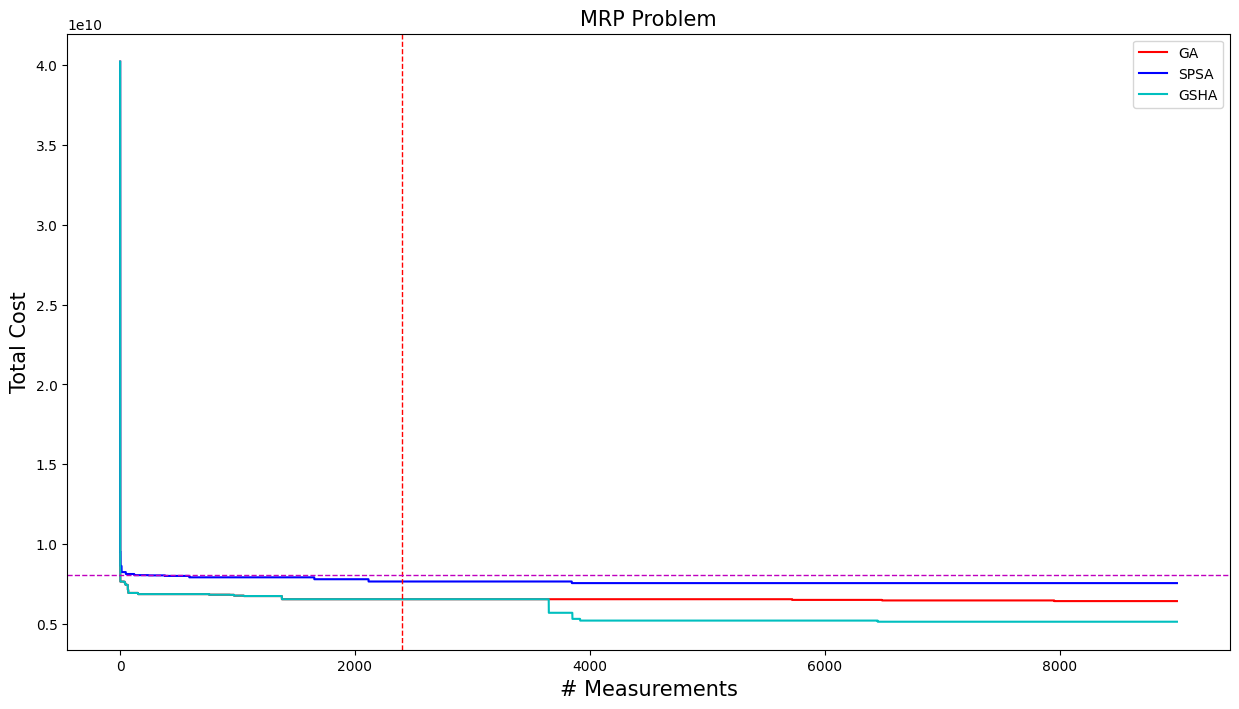

In [30]:
for i in range(3651, 9001): bl_gsha[i] += (6796269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0:2], ir_target)

5279


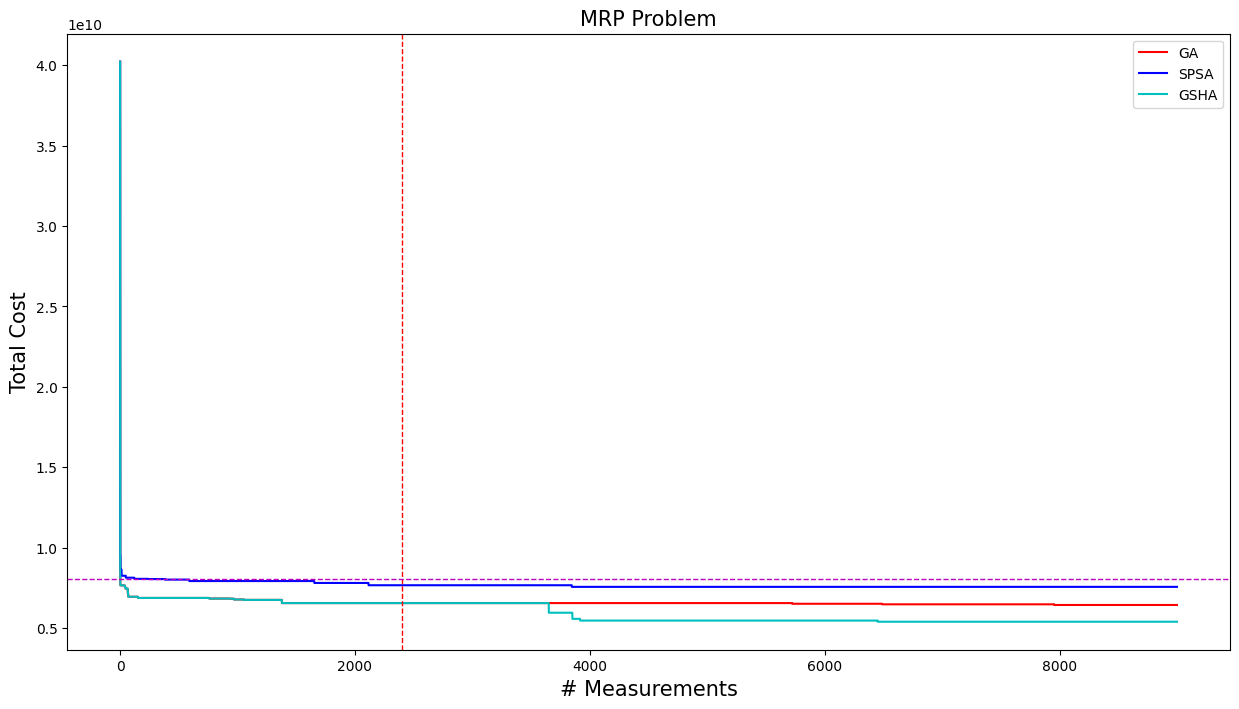

In [31]:
for i in range(3651, 9001): bl_gsha[i] += (6796269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0:2], ir_target)

2182


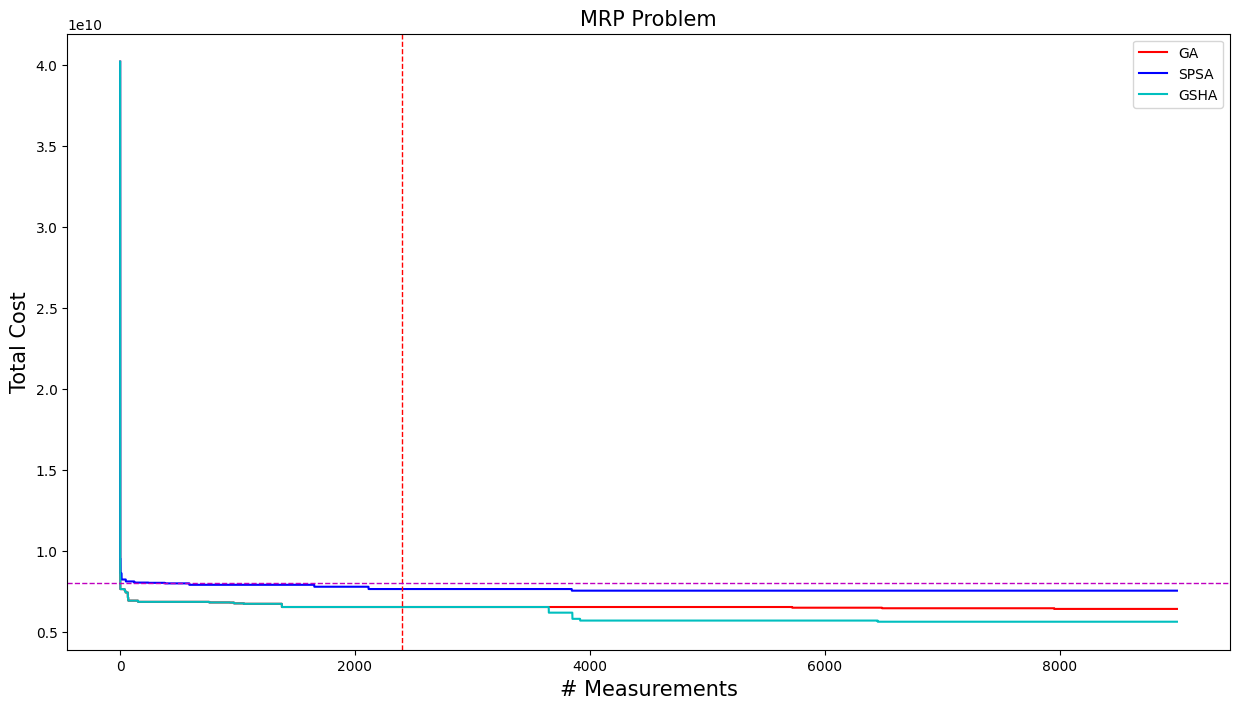

In [32]:
for i in range(3651, 9001): bl_gsha[i] += (6796269805-6545444404)
visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0:2], ir_target)

In [33]:
bl_gsha[3800]

6196269805.0

In [34]:
6196269805/0.2

30981349025.0

6813


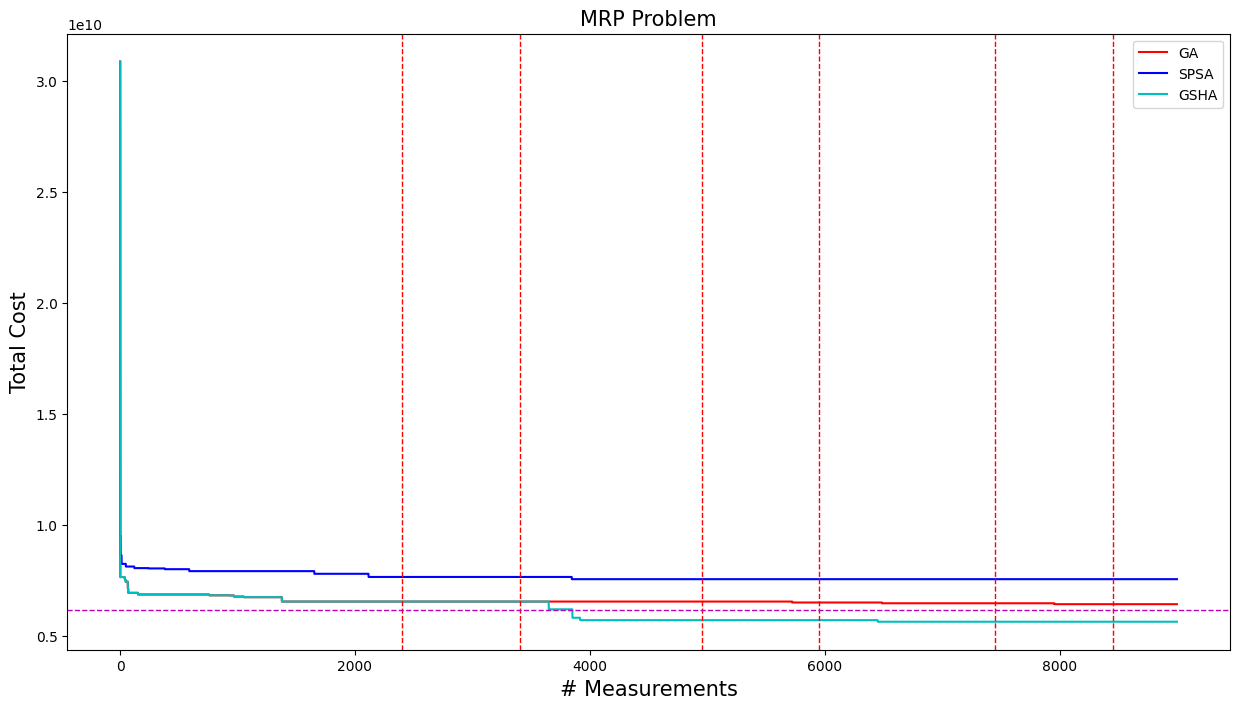

In [35]:
initial_fit = 30881349025
bl_ga[0] = initial_fit
bl_spsa[0] = initial_fit
bl_gsha[0] = initial_fit
ir_target = initial_fit*0.2
visualization.vis(bl_ga, bl_spsa, bl_gsha, d, ir_target)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\MB608\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-def0cd9370a7>", line 6, in <module>
    visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0], ir_target)
  File "c:\Users\MB608\Desktop\theis_MRP\theis_MRP\visualization.py", line 22, in vis
TypeError: object of type 'int' has no len()

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\MB608\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\MB608\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_

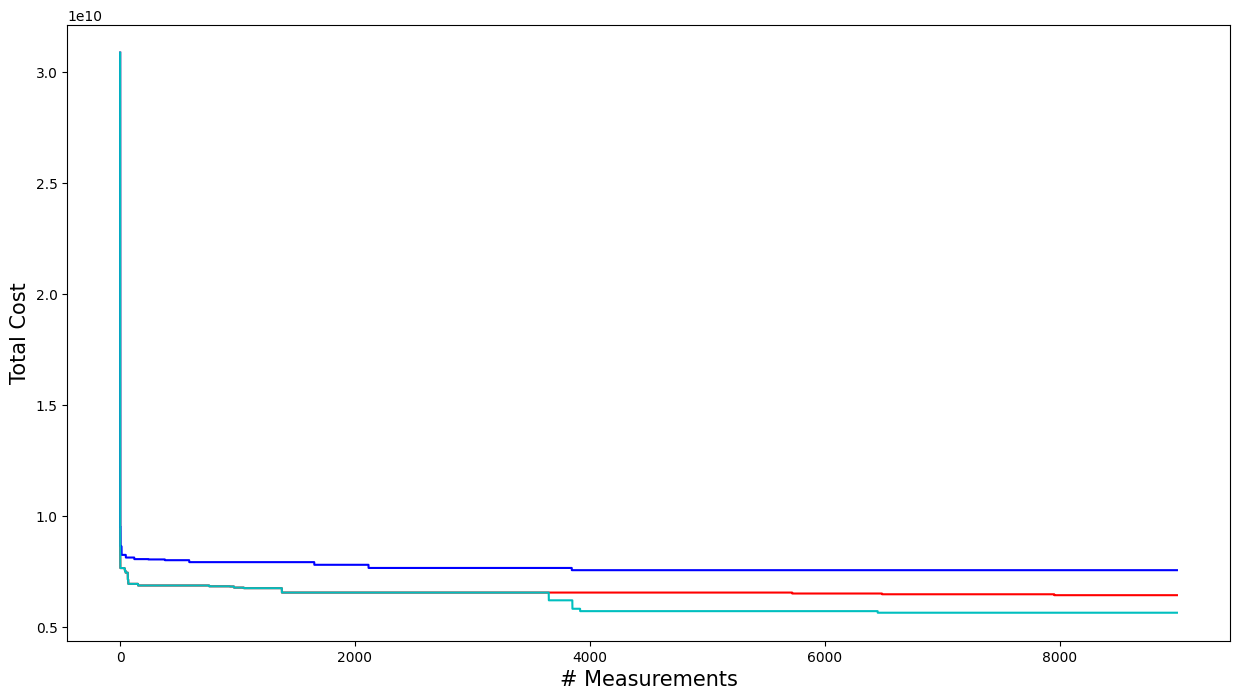

In [36]:
initial_fit = 30881349025
bl_ga[0] = initial_fit
bl_spsa[0] = initial_fit
bl_gsha[0] = initial_fit
ir_target = initial_fit*0.2
visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0], ir_target)

4294


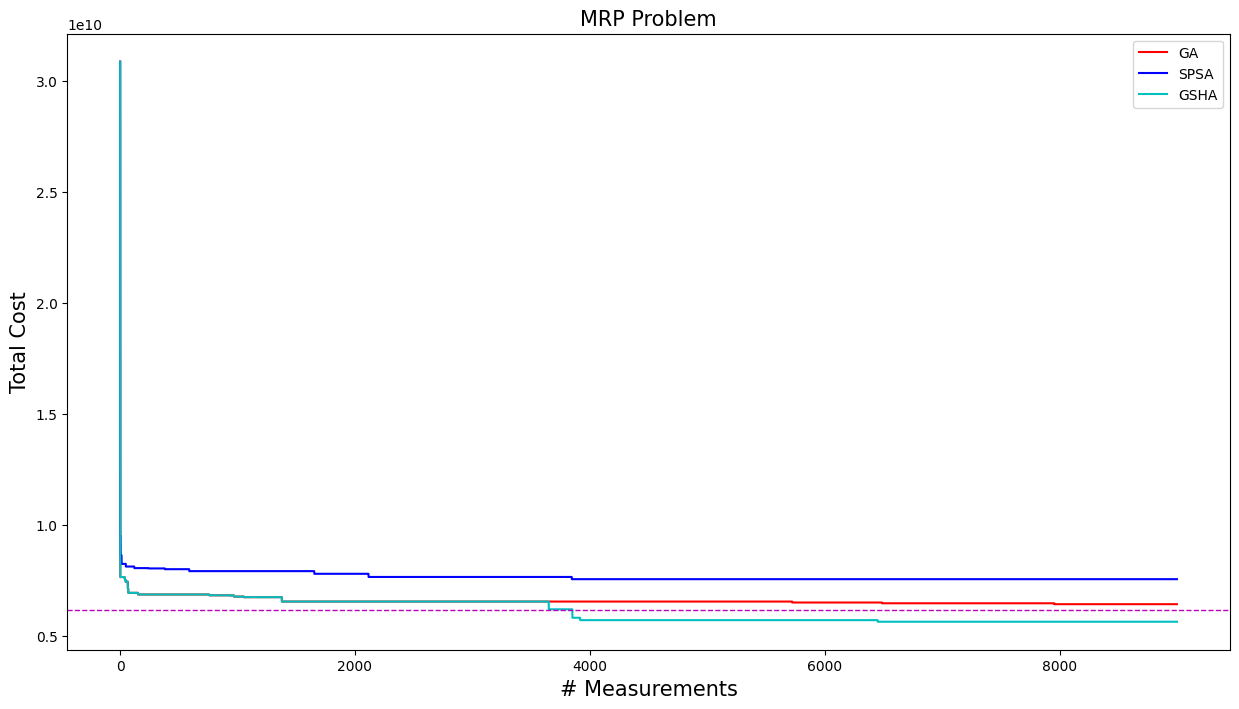

In [37]:
initial_fit = 30881349025
bl_ga[0] = initial_fit
bl_spsa[0] = initial_fit
bl_gsha[0] = initial_fit
ir_target = initial_fit*0.2
visualization.vis(bl_ga, bl_spsa, bl_gsha, d[0:1], ir_target)

In [38]:
ir_target

6176269805.0

In [39]:
print(min(bl_ga),min(bl_spsa),min(bl_gsha))

6427286521.5 7554523117.5 5636747397.5


In [40]:
print(min(bl_ga)/initial_fit,min(bl_spsa)/initial_fit,min(bl_gsha)/initial_fit)

0.20812842458070047 0.24463060572205686 0.1825291826771159


In [41]:
import simulation_model_new as simulation_model
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def cost_evaluation(T, product_size, item_size, arrival, sample_lb = 30, cl = 0.95):
    sample_size = sample_lb
    sample_list = []
    for i in range(sample_lb):
        sample_list.append(simulation_model.ans_fun(arrival, T, product_size, item_size))

    error_ratio = 1
    while error_ratio >= 0.001:
        sample_size += 1
        sample_list.append(simulation_model.ans_fun(arrival, T, product_size, item_size))

        sample_mean = np.mean(sample_list)
        sample_std = np.std(sample_list)
        ci = stats.norm.interval(cl, sample_mean, sample_std/ np.sqrt(sample_size))
        error_ratio = (ci[1]-sample_mean)/sample_mean

    print(sample_mean, sample_std, ci, error_ratio, sample_size)
    
    '''# visulization
    plt.hist(sample_list, bins=100)
    plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
    plt.show()
    '''
    
    return sample_mean, sample_std, sample_size

'''# test
arrival = np.array([48, 40, 21, 18, 4, 33, 31, 15, 15,  5, 24, 50, 27 , 1, 2])
arrival = np.array([48, 40, 21, 18, 4, 33, 31, 15, 15,  5, 24, 50, 27 , 1, 2])
T, product_size, item_size = (200, 40, 30)
sample_mean, sample_std, sample_size = cost_evaluation(T, product_size, item_size, np.ones((T, item_size))*38400) # arrival.reshape(T,item_size)
'''


'# test\narrival = np.array([48, 40, 21, 18, 4, 33, 31, 15, 15,  5, 24, 50, 27 , 1, 2])\narrival = np.array([48, 40, 21, 18, 4, 33, 31, 15, 15,  5, 24, 50, 27 , 1, 2])\nT, product_size, item_size = (200, 40, 30)\nsample_mean, sample_std, sample_size = cost_evaluation(T, product_size, item_size, np.ones((T, item_size))*38400) # arrival.reshape(T,item_size)\n'

In [42]:
# cost evaluation
sample_mean_initial, sample_std_initial, sample_size_initial = cost_evaluation(T, product_size, item_size, initial_sol.reshape(T,item_size))
sample_mean_ga, sample_std_ga, sample_size_ga =cost_evaluation(T, product_size, item_size, ans_ga)
sample_mean_spsa, sample_std_spsa, sample_size_spsa = cost_evaluation(T, product_size, item_size, ans_spsa)
sample_mean_gsha, sample_std_gsha, sample_size_gsha = cost_evaluation(T, product_size, item_size, ans_gsha)


40265385419.166664 431021501.7776581 (40225157484.87873, 40305613353.4546) 0.000999069892642441 441
7999710105.694468 349620094.59336084 (7991710738.672265, 8007709472.71667) 0.0009999571130094162 7338
8763122564.72862 348280459.654705 (8754360254.379448, 8771884875.077793) 0.000999907314367678 6069
8045957624.981469 355528934.9933745 (8037911931.925332, 8054003318.037606) 0.0009999671177929694 7501
